In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
df=pd.read_csv(r'Mall_Customers.csv',index_col=0,header=0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [7]:
df["Gender"]=df.Gender.map({"Female":0,"Male":1})

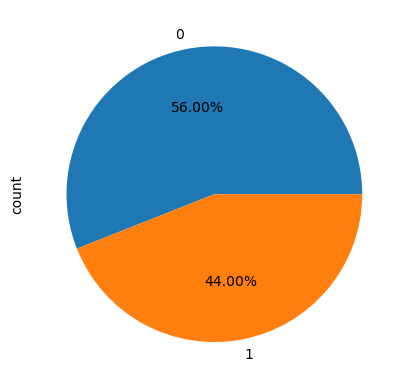

In [10]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f%%");

In [11]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [12]:
X = df.values[:,[2,3]]
# Considering Input variables as Annual Income & Spending score

In [14]:
#X

In [15]:
import warnings
warnings.filterwarnings("ignore")

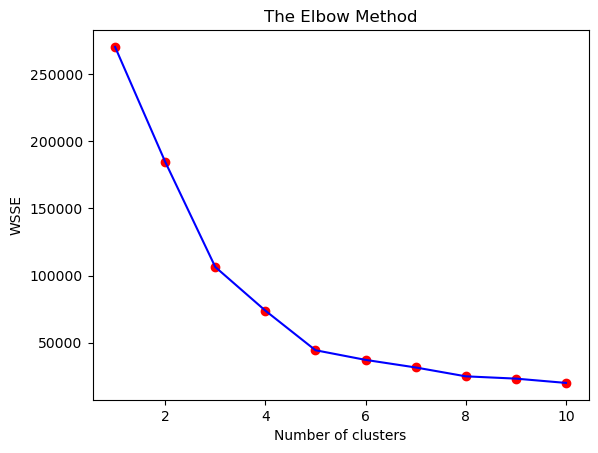

In [16]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wsse,c="blue")
plt.scatter(range(1, 11),wsse,c="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [17]:
print(wsse)

[269981.28, 184609.9843409062, 106348.37306211119, 73880.64496247195, 44448.45544793371, 37265.86520484346, 31632.259809473475, 25038.83620868515, 23337.40705378208, 20137.434537925845]


In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5,  random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X)--->training
#Y_pred=kmeans.predict(X)--->predicting

In [19]:
Y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [20]:
kmeans.inertia_

44448.45544793371

In [21]:
kmeans.n_iter_

7

In [22]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [35]:
df["Clusters"]=Y_pred
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,19,15,39,4
2,1,21,15,81,2
3,0,20,16,6,4
4,0,23,16,77,2
5,0,31,17,40,4
...,...,...,...,...,...
196,0,35,120,79,3
197,0,45,126,28,0
198,1,32,126,74,3


In [36]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

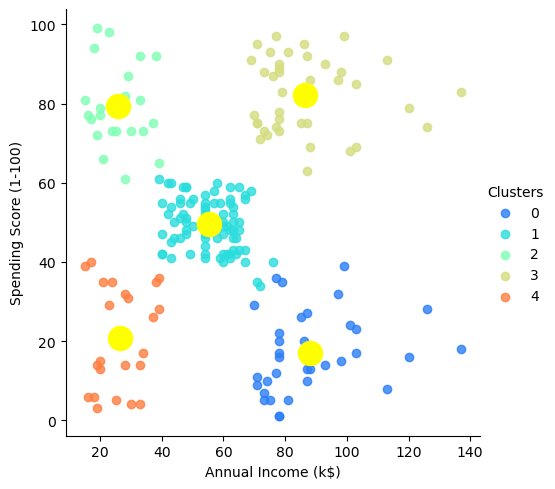

In [37]:
sns.lmplot(data=df, x="Annual Income (k$)",y="Spending Score (1-100)",
          fit_reg=False, #No regression line
          hue="Clusters",palette="rainbow")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=300,c="yellow")
plt.show()

In [38]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [39]:
df["Clusters"]=df.Clusters.map({0:"Standard",1:"Valuable",2:"Most Valuable",
                               3:"Elite",4:"Careful"})
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,19,15,39,Careful
2,1,21,15,81,Most Valuable
3,0,20,16,6,Careful
4,0,23,16,77,Most Valuable
5,0,31,17,40,Careful
...,...,...,...,...,...
196,0,35,120,79,Elite
197,0,45,126,28,Standard
198,1,32,126,74,Elite


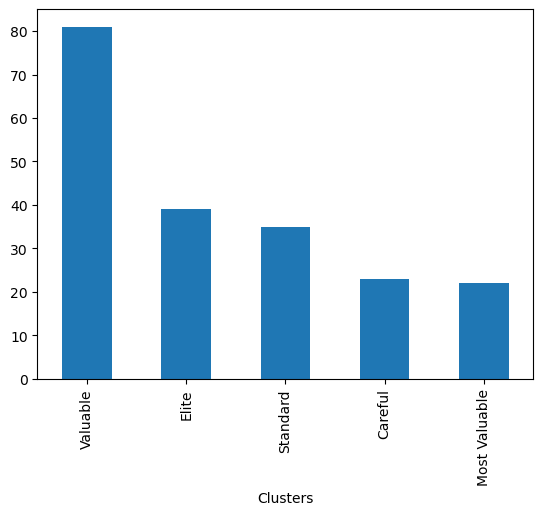

In [40]:
#pd.set_option("display.max_rows",None)

df["Clusters"].value_counts().plot(kind="bar");

In [42]:
new_df=df[df["Clusters"]=="Most Valuable"]
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
2,1,21,15,81,Most Valuable
4,0,23,16,77,Most Valuable
6,0,22,17,76,Most Valuable
8,0,23,18,94,Most Valuable
10,0,30,19,72,Most Valuable
12,0,35,19,99,Most Valuable
14,0,24,20,77,Most Valuable
16,1,22,20,79,Most Valuable
18,1,20,21,66,Most Valuable


In [43]:
new_df.shape

(22, 5)

In [44]:
import os
os.getcwd()

'C:\\Users\\USER\\Downloads'

In [45]:
df.to_excel(r"TargetCustomers.xlsx",index=True)